In [1]:
# Initial imports.

import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
import matplotlib.pyplot 
from scipy import stats
import matplotlib.pyplot as plt
from imblearn.ensemble import BalancedRandomForestClassifier

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

In [8]:
"postgresql://[emili]:[Sashabean]@[127.0.0.1]:[5432]/[Patient_database]"

'postgresql://[emili]:[Sashabean]@[127.0.0.1]:[5432]/[Patient_database]'

In [15]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [16]:
# Save references to each table
Patient_database = Base.classes.Patient_database


AttributeError: Patient_database

In [17]:
# Create our session (link) from Python to the DB

engine = create_engine(db_string)

NameError: name 'db_string' is not defined

In [18]:
for data in pd.read_csv(f'{file_dir}database_patient.csv', chunksize=1000000):
    data.to_sql(name='database_patient', con=engine, if_exists='append')

NameError: name 'file_dir' is not defined

In [6]:
file_path = Path("C:/Users/emili/Class/Patient_Survival_Prediction/Machine_Learning/Resources/database_patient.csv")
df_database_patient = pd.read_csv(file_path)
df_database_patient.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,icu_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68,22.73,0,2,1,1,...,0,0,1,0,0,0,0,0,9,0
1,114252,59342,81,0,77,27.42,0,2,0,1,...,0,0,1,0,0,0,0,0,8,6
2,119783,50777,118,0,25,31.95,0,2,0,0,...,0,0,0,0,0,0,0,0,5,3
3,79267,46918,118,0,81,22.64,1,2,0,2,...,0,0,0,0,0,0,0,0,0,0
4,33181,74489,83,0,67,27.56,0,2,1,0,...,0,0,1,0,0,0,0,0,7,4


In [7]:
df_database_patient=df_database_patient.drop(columns=['patient_id', 'hospital_id', 'encounter_id'])

In [8]:
# Create our features

X = df_database_patient.drop('hospital_death', axis=1)


X.head()

,age,bmi,elective_surgery,ethnicity,gender,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,68,22.73,0,2,1,1,92,0,2,0.541667,...,0,0,1,0,0,0,0,0,9,0
1,77,27.42,0,2,0,1,90,0,5,0.927778,...,0,0,1,0,0,0,0,0,8,6
2,25,31.95,0,2,0,0,93,0,5,0.000694,...,0,0,0,0,0,0,0,0,5,3
3,81,22.64,1,2,0,2,92,0,2,0.000694,...,0,0,0,0,0,0,0,0,0,0
4,67,27.56,0,2,1,0,95,0,5,0.000694,...,0,0,1,0,0,0,0,0,7,4


In [10]:
X.describe

<bound method NDFrame.describe of        age        bmi  elective_surgery  ethnicity  gender  icu_admit_source  \
0       68  22.730000                 0          2       1                 1   
1       77  27.420000                 0          2       0                 1   
2       25  31.950000                 0          2       0                 0   
3       81  22.640000                 1          2       0                 2   
4       67  27.560000                 0          2       1                 0   
...    ...        ...               ...        ...     ...               ...   
73257   47  51.439842                 1          2       1                 2   
73258   54  19.770448                 0          4       1                 0   
73259   75  23.060250                 0          2       1                 1   
73260   56  47.179671                 0          2       0                 1   
73261   82  22.031250                 1          2       0                 2   

     

In [11]:
#Create our target 

y = df_database_patient['hospital_death']

y.value_counts()

0    67400
1     5862
Name: hospital_death, dtype: int64

In [12]:
# Split data into Training and Testing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [13]:
# Check balances
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 50550, 1: 4396})
Counter({0: 16850, 1: 1466})


In [16]:
# Instantiate RBC

brfc = BalancedRandomForestClassifier(n_estimators=1000, random_state=1)

# Fit

brfc.fit(X_train, y_train)

BalancedRandomForestClassifier(n_estimators=1000, random_state=1)

In [17]:
y_pred = brfc.predict(X_test)
RandomForest_accuracy_database = balanced_accuracy_score(y_test, y_pred)

RandomForest_accuracy_database

0.7944126612717137

In [18]:
# Display the confusion matrix
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Survival", "Actual Death"], columns=["Predicted Survival", "Predicted Death"])

cm_df

,Predicted Survival,Predicted Death
Actual Survival,13117,3733
Actual Death,278,1188


In [19]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.78      0.81      0.87      0.79      0.63     16850
          1       0.24      0.81      0.78      0.37      0.79      0.63      1466

avg / total       0.92      0.78      0.81      0.83      0.79      0.63     18316



In [20]:
# List the features sorted in descending order by feature importance
features_rank = sorted(zip(brfc.feature_importances_, X.columns), reverse=True)
for feature in features_rank:
    print(f"{feature[1]}: ({feature[0]})")

ventilated_apache: (0.0448889890019424)
gcs_motor_apache: (0.039037490418697654)
age: (0.036557252012101166)
d1_sysbp_noninvasive_min: (0.03507592484196871)
gcs_verbal_apache: (0.03428894805862581)
d1_sysbp_min: (0.0341300891221665)
d1_spo2_min: (0.03086663230624626)
gcs_eyes_apache: (0.028050369598221648)
d1_mbp_min: (0.026035326733977113)
d1_heartrate_max: (0.025940622821996846)
d1_temp_min: (0.024953210362762455)
d1_mbp_noninvasive_min: (0.024325816736358696)
d1_resprate_max: (0.024137494811747724)
temp_apache: (0.024009338474895874)
pre_icu_los_days: (0.023781544861406906)
bmi: (0.02120166176532859)
d1_heartrate_min: (0.02106651756508995)
heart_rate_apache: (0.0205566590754477)
h1_resprate_min: (0.020396894322135244)
map_apache: (0.019394165346980043)
h1_resprate_max: (0.01918573008802336)
d1_diasbp_noninvasive_min: (0.01865095516854182)
d1_temp_max: (0.01856906295222711)
h1_sysbp_min: (0.01845180396177114)
resprate_apache: (0.018265772130182985)
d1_diasbp_min: (0.01790206722209696

Text(0.5, 1.0, 'Feature Importance All Vitals')

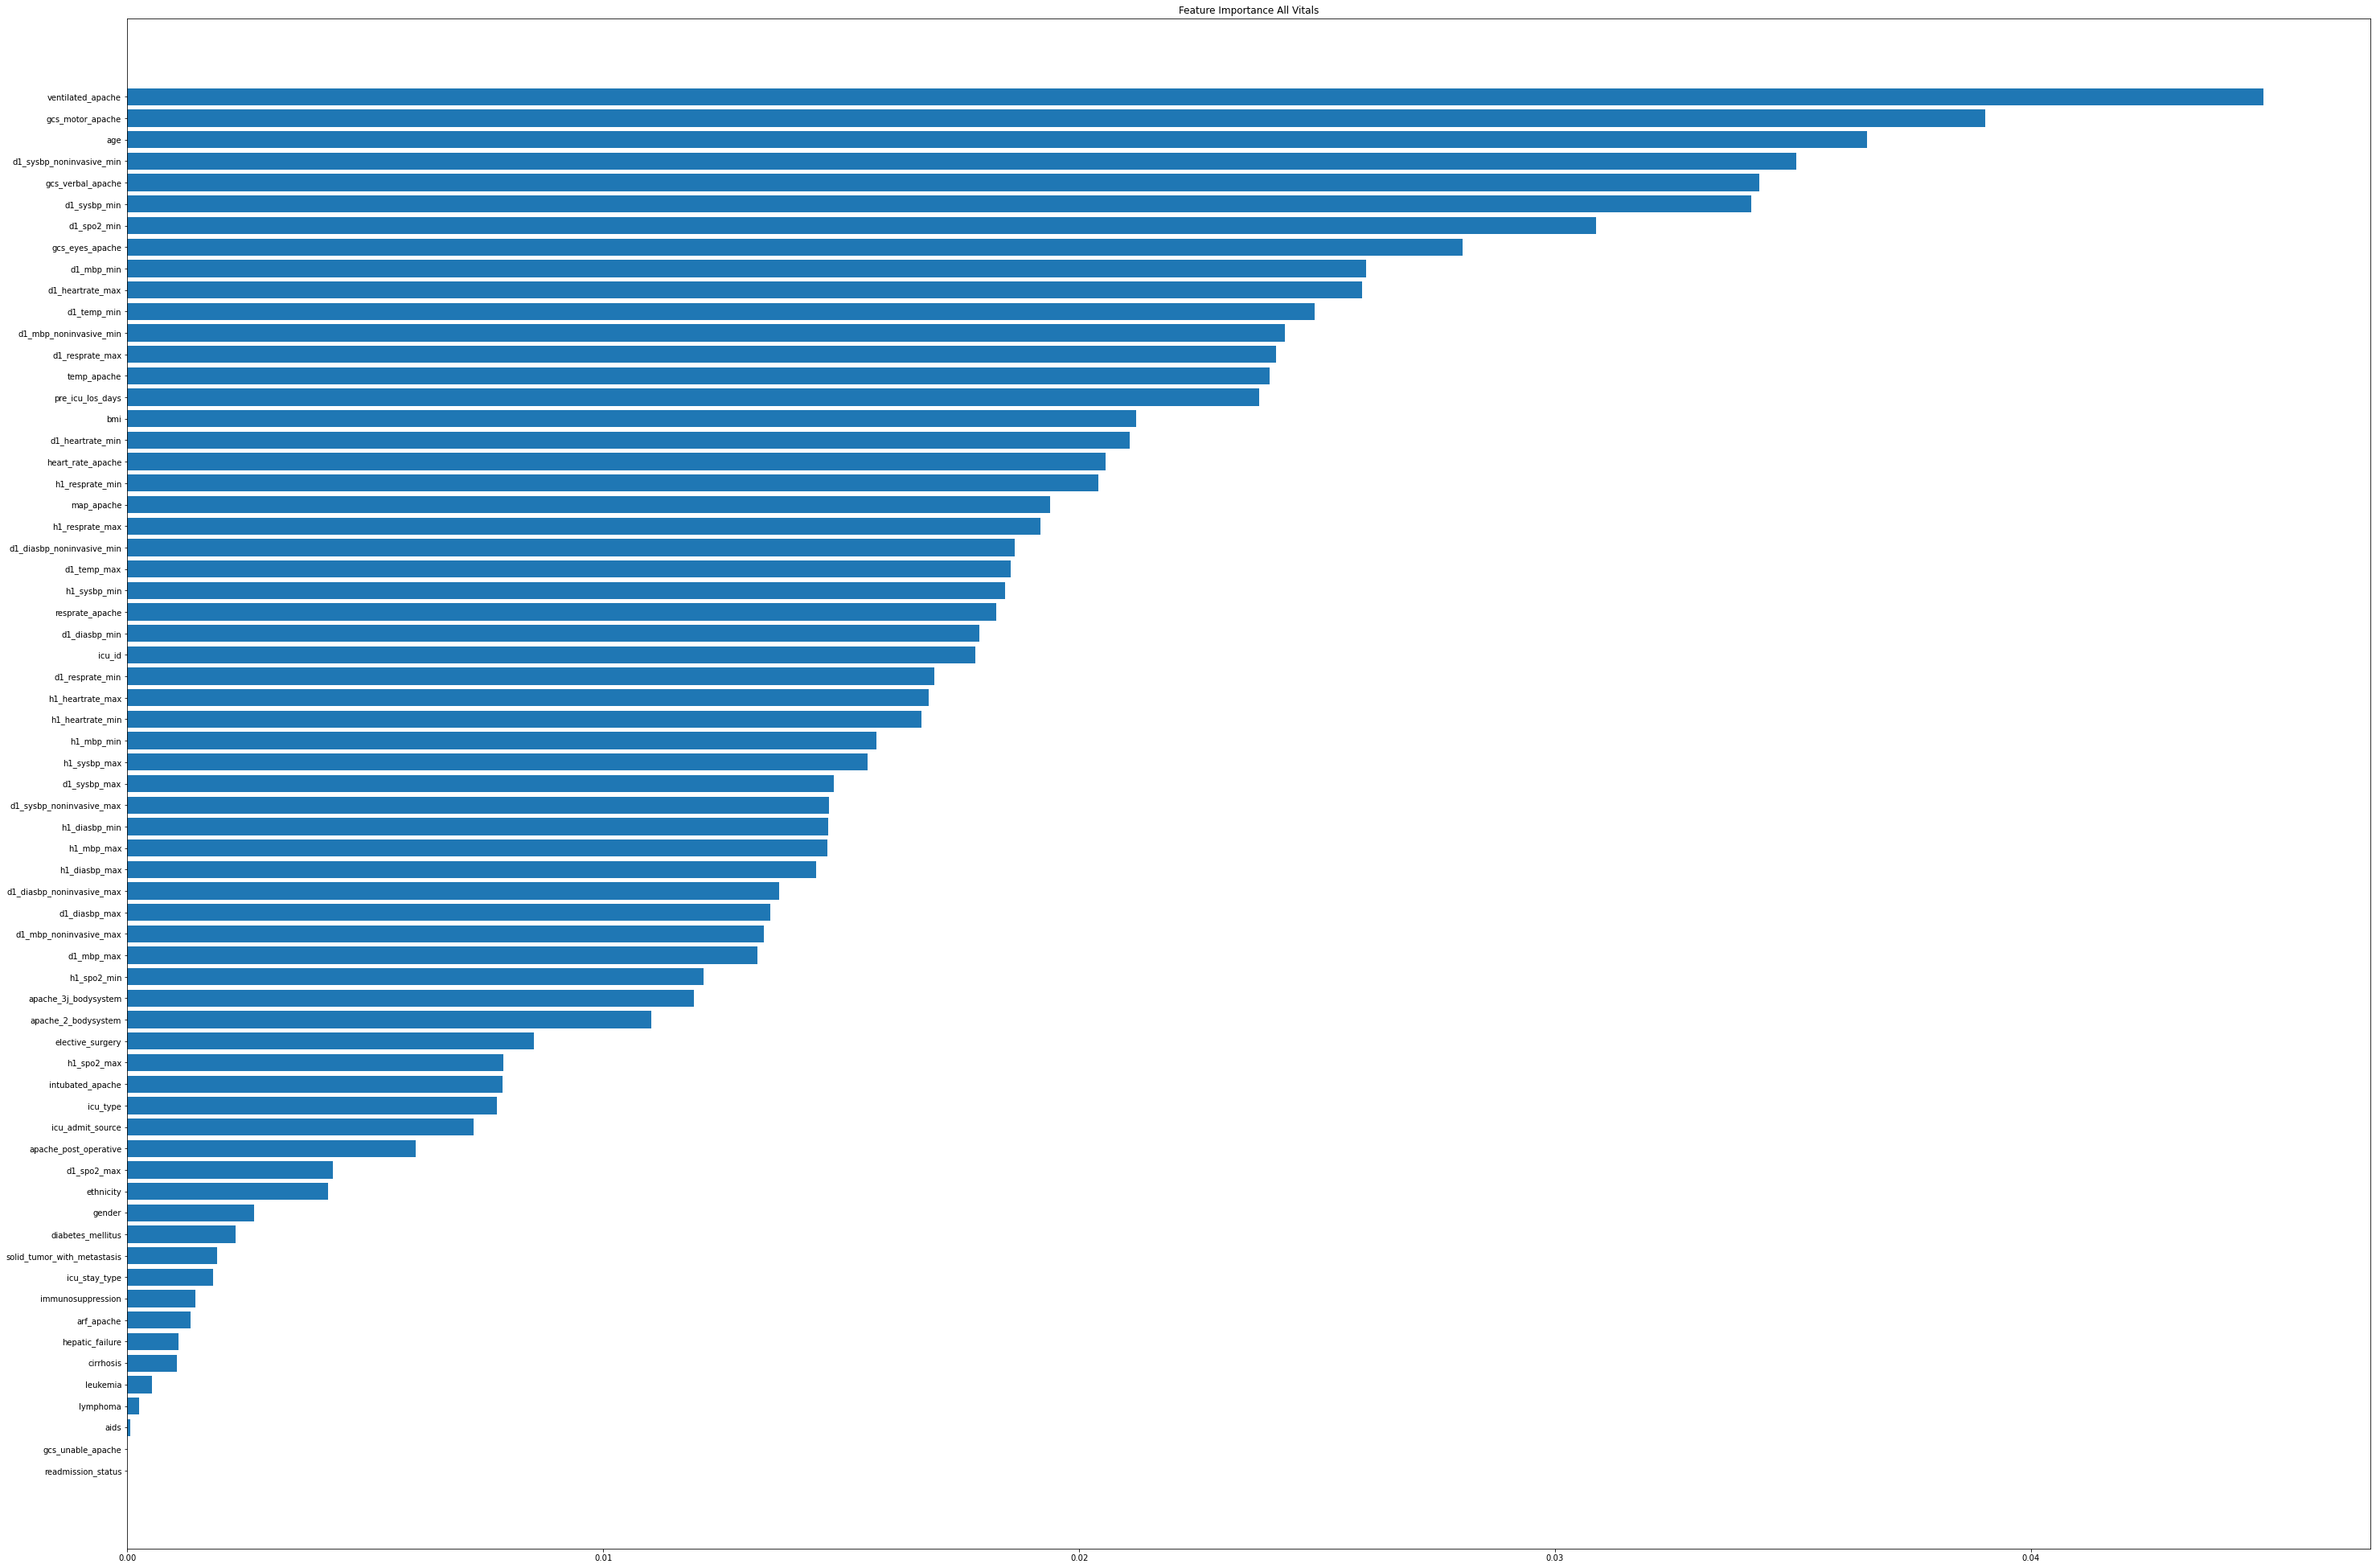

In [21]:
# Plot Features 

feature_importance = brfc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fit = plt.figure(figsize=(50,35))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance All Vitals')